# Latar Belakang

Dataset berisi informasi rinci dari setengah juta data yang didapat dari beberapa e-commerce di Pakistan dari Maret 2016 hingga Agustus 2018. Tujuan sebelumnya dataset ini dikumpulkan bertujuan sebagai bahan pembelajaran dan latihan.

# Tujuan Analisis

Tujuan dari exploratory data analysis ini adalah memahami bagaimana karakteristik, performa, dan gambaran dari e-commerce di Pakistan yang nantinya mampu memberikan masukan dan rekomendasi tindakan yang harus diambil sebagai strategi perusahaan e-commerce di kemudian hari.

# Pertanyaan Masalah
1. Produk kategori apa yang paling laku dijual oleh e-commerce dari  Maret 2016 sampai Agustus 2018
2. Produk kategori apa yang memberikan pendapatan terbesar?
3. Bagaimana trend pendapatan e-commerce dilihat dari tahun dan bulan?
4. Bagaimana status order e-commerce dari Maret 2016 sampai Agustus 2018?
5. Apakah ada kecenderungan konsumen untuk menggunakan sales commission code?

# Data Set

Data Set yang digunakan untuk melakukan data analisis pada capstone project kali ini diambil dari:<br>
https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset

# Library

Berikut adalah library yang digunakan untuk melakukan penelitian ini

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore")

Variabel yang tersedia dalam dataset antara lain: 
- Item_ID = id untuk setiap produk yang dijual
- Status = status pesanan pelanggan
- Date of Order/ created_at = tanggal pesanan
- SKU = kode unik yang diberikan kepada setiap item barang
- Price = harga
- qty_ordered = kuantitas
- grand_total = total harga pesanan
- Increment_id= kode struk
- Category_name_1 = kategori produk
- sales_commission_code = kode komisi penjualan
- Discount_amount = potongan harga
- Payment Method = metode pembayaran yang digunakan
- Working_date = Jam kerja
- BI_Status = informasi terkait proses pemesanan barang
- MV : Harga satuan produk
- Year = tahun
- Month = Bulan
- Customer_since = informasi tanggal,bulan dan tahun pelanggan bergabung
- M-Y = Tahun dan Bulan
- Customer ID = id pelanggan
- FY = Tahun Fiskal
- Unnamed : 21 = Empty Column
- Unnamed : 22 = Empty Column
- Unnamed : 23 = Empty Column
- Unnamed : 24 = Empty Column
- Unnamed : 25 = Empty Column

Berikut ini merupakan 5 data teratas dari dataset

In [49]:
df = pd.read_csv(r'D:\Belajar Data Science\Capstone Project\Pakistan Largest Ecommerce Dataset.csv')
df.head(4)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.000,complete,7/1/2016,kreations_YI 06-L,1950.000,1.000,1950.000,100147443,Women's Fashion,\N,...,7.000,2016-7,7-2016,FY17,1.000,NaN,NaN,NaN,NaN,NaN
1,211133.000,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.000,1.000,240.000,100147444,Beauty & Grooming,\N,...,7.000,2016-7,7-2016,FY17,2.000,NaN,NaN,NaN,NaN,NaN
2,211134.000,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.000,1.000,2450.000,100147445,Women's Fashion,\N,...,7.000,2016-7,7-2016,FY17,3.000,NaN,NaN,NaN,NaN,NaN
3,211135.000,complete,7/1/2016,kcc_krone deal,360.000,1.000,60.000,100147446,Beauty & Grooming,R-FSD-52352,...,7.000,2016-7,7-2016,FY17,4.000,NaN,NaN,NaN,NaN,NaN


# Data Understanding and Cleanning

Sebelum melakukan data analysis, hal pertama yang harus dilakukan adalah memahami dan mengenal dataset kita terlebih dahulu. Tahap ini kita akan tahu anomali apa saja yang ada dalam data yang kita miliki sehingga dapat dilakukan data cleanning.

Informasi Umum dari dataset berupa jumlah baris dan jenis data yang ada

In [50]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (1048575, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524

Hasil informasi yang didapat dikatakan bahwa terdapat 1.048.575 baris dan 26 kolom. Dari 26 kolom yang ada, terdapat 5 kolom yang tidak berisi yang akan dihapus dari data set. Selain itu ada (1.048.575-584524) 464.051 baris yang tidak ada isinya (NaN) sehingga akan dihapus untuk tahap awal.

In [51]:
# menghapus kolom yang tidak memiliki data
df.drop(columns=['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'], inplace=True)

In [52]:
# menghapus baris yang seluruh nilainya NaN
df = df.dropna(how = 'all')

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_id,584524.000,565667.074,200121.174,211131.000,395000.750,568424.500,739106.250,905208.000
price,584524.000,6348.748,14949.270,0.000,360.000,899.000,4070.000,1012625.900
qty_ordered,584524.000,1.296,3.996,1.000,1.000,1.000,1.000,1000.000
grand_total,584524.000,8530.619,61320.815,-1594.000,945.000,1960.400,6999.000,17888000.000
discount_amount,584524.000,499.493,1506.943,-599.500,0.000,0.000,160.500,90300.000
Year,584524.000,2017.044,0.707,2016.000,2017.000,2017.000,2018.000,2018.000
Month,584524.000,7.168,3.486,1.000,4.000,7.000,11.000,12.000
Customer ID,584513.000,45790.512,34414.962,1.000,13516.000,42856.000,73536.000,115326.000


In [54]:
df.describe(include='object').T

,count,unique,top,freq
status,584509,16,complete,233685
created_at,584524,789,11/25/2016,15169
sku,584504,84889,MATSAM59DB75ADB2F80,3775
increment_id,584524,408785,100266667,72
category_name_1,584360,16,Mobiles & Tablets,115710
sales_commission_code,447349,7226,\N,339001
payment_method,584524,18,cod,271960
Working Date,584524,789,11/25/2016,15169
BI Status,584524,4,Net,234178
MV,584524,9720,999,9516


Tabel diatas menunjukan deskripsi dari dataset yang diteliti. tabel pertama menunjukan deskripsi data yang bersifat numerik sedangkan tabel kedua menunjukan deskripsi data yang berisfat category. Untuk lebih isi lebih detail akan ditunjukan pada tabel berikutnya

In [55]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,item_id,584524,"[211131.0, 211133.0, 211134.0, 211135.0, 211136.0, 211137.0, 211138.0, 211139.0, 211140.0, 211141.0, 211142.0, 211143.0, 211144.0, 211145.0, 211146.0, 211147.0, 211149.0, 211150.0, 211151.0, 211152.0, 211153.0, 211154.0, 211155.0, 211156.0, 211157.0, 211158.0, 211160.0, 211162.0, 211163.0, 211164.0, 211166.0, 211168.0, 211169.0, 211170.0, 211171.0, 211172.0, 211173.0, 211174.0, 211175.0, 211176.0, 211177.0, 211179.0, 211180.0, 211182.0, 211184.0, 211185.0, 211186.0, 211187.0, 211188.0, 211189.0, 211190.0, 211191.0, 211192.0, 211193.0, 211194.0, 211196.0, 211197.0, 211198.0, 211199.0, 211200.0, 211202.0, 211201.0, 211203.0, 211204.0, 211205.0, 211206.0, 211207.0, 211208.0, 211209.0, 211211.0, 211212.0, 211213.0, 211214.0, 211215.0, 211217.0, 211218.0, 211219.0, 211220.0, 211221.0, 211222.0, 211223.0, 211225.0, 211224.0, 211226.0, 211227.0, 211228.0, 211229.0, 211230.0, 211231.0, 211232.0, 211233.0, 211234.0, 211235.0, 211236.0, 211237.0, 211238.0, 211239.0, 211240.0, 211241.0, 211242.0, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, nan, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, 

In [56]:
# menghapus kolom yang tidak digunakan
df.drop(columns=['Working Date', 'Customer Since', 'FY',' MV ','BI Status'], inplace=True)

Setelah melakukan penghapusan baris yang seluruhnya kosong, dari hasil tabel diatas diketahui bahwa ada beberapa kolom yang masih memiliki data kosong. kolom tersebut adalah kolom status, sku, category_name_1,sales_commission_code, Customer Since, Customer ID. Data kosong dalam kolom tersebut diwakili dengan data NaN. Untuk tahap selanjutnya akan dilakukan analisis lebih lanjut lagi terkait data NaN tersebut, apakah akan dihapus atau dirubah.<br><br>
Selain itu akan dilakukan beberapa kolom yang tidak akan digunakan dalam data analisis ini yaitu: 
 - working date, Customer Since, dan FY --> merupakan data yang sama sehingga hanya akan menggunakan kolom created date
 - MV --> karena data merupakan duplikat dari price
 - BI status --> karena sulit untuk dikuantifikasi<br>

## Missing Value

In [57]:
# Jumlah Missing Value disetiap kolom
df.isna().sum()

item_id                  0     
status                   15    
created_at               0     
sku                      20    
price                    0     
qty_ordered              0     
grand_total              0     
increment_id             0     
category_name_1          164   
sales_commission_code    137175
discount_amount          0     
payment_method           0     
Year                     0     
Month                    0     
M-Y                      0     
Customer ID              11    
dtype: int64

In [58]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

item_id                 0.000 
status                  0.003 
created_at              0.000 
sku                     0.003 
price                   0.000 
qty_ordered             0.000 
grand_total             0.000 
increment_id            0.000 
category_name_1         0.028 
sales_commission_code   23.468
discount_amount         0.000 
payment_method          0.000 
Year                    0.000 
Month                   0.000 
M-Y                     0.000 
Customer ID             0.002 
dtype: float64

Data diatas dapat dilihat terdapat beberapa kolom yang masih memiliki data yang *missing value* yaitu kolom status, sku, category_name_1, sales_commission_code, dan Customer ID. Kolom sales_comission_code memiliki *missing value* paling banyak yaitu 137.175 data atau 23.46% dari total keseluruhan data yang ada. Apabila dihapus tentu saja akan mempengaruhi hasil data analisis kedepannya, sedangkan untuk kolom lainnya hanya memiliki sedikit *missing value* sehingga apabila datanya dihapus tidak akan berpengaruh besar terhadap hasil analisis.

In [59]:
# data dari kolom sales_commission_code
df['sales_commission_code'].value_counts()

\N                339001
40968             2710  
C-LHW-50074       2434  
C-RWP-31924       1720  
cisb30211         1613  
                  ...   
100278139         1     
rwp-wah-104124    1     
C-FSD-42199       1     
Cfsd43702         1     
C LHE 45016       1     
Name: sales_commission_code, Length: 7226, dtype: int64

Dari hasil data sales_commission_code bisa dikatakan bahwa pelanggan yang tidak menggunakan kode komisi penjualan adalah yang paling banyak.<br>
Asusmsi yang dapat diberikan kepada kolom sales_commision_code yaitu kemungkinan *missing value* terjadi dikarenakan pelanggan tidak memilih opsi \N dan lebih memilih untuk tidak mengisi kode komisi penjualan sama sekali. Tahap berikutnya *missing value* pada kolom sales_commision_code akan diisi dengan \N.

In [60]:
df.sales_commission_code = df.sales_commission_code.fillna('\\N')

In [61]:
# data pada kolom sales_commission_code setelah dilakukan pengisian
df['sales_commission_code'].value_counts()

\N                476176
40968             2710  
C-LHW-50074       2434  
C-RWP-31924       1720  
cisb30211         1613  
                  ...   
100278139         1     
rwp-wah-104124    1     
C-FSD-42199       1     
Cfsd43702         1     
C LHE 45016       1     
Name: sales_commission_code, Length: 7226, dtype: int64

In [62]:
# jumlah missing value untuk kolom category_name_1
df['category_name_1'].isna().sum()

164

In [63]:
df['category_name_1'].value_counts()

Mobiles & Tablets     115710
Men's Fashion         92221 
Women's Fashion       59721 
Appliances            52413 
Superstore            43613 
Beauty & Grooming     41496 
Soghaat               34011 
Others                29218 
Home & Living         26504 
Entertainment         26326 
Health & Sports       17502 
Kids & Baby           16494 
Computing             15933 
\N                    7850  
School & Education    3478  
Books                 1870  
Name: category_name_1, dtype: int64

Dari hasil data category_name_1 terdapat 164 data *missing value*. Ada beberapa cara yang bisa digunakan untuk menghilangkan *missing value* tersebut yaitu salah satu dengan cara menghapus baris yang memiliki *missing value*, namun hal tersebut adalah cara terakhir jika tidak ada opsi lain. Pada kolom category_name_1 *missing value* akan diasumsikan sebagai value *others* dibanding harus menghapus baris tersebut. 

In [64]:
df.category_name_1 = df.category_name_1.fillna('Others')

In [65]:
df['category_name_1'].value_counts()

Mobiles & Tablets     115710
Men's Fashion         92221 
Women's Fashion       59721 
Appliances            52413 
Superstore            43613 
Beauty & Grooming     41496 
Soghaat               34011 
Others                29382 
Home & Living         26504 
Entertainment         26326 
Health & Sports       17502 
Kids & Baby           16494 
Computing             15933 
\N                    7850  
School & Education    3478  
Books                 1870  
Name: category_name_1, dtype: int64

In [66]:
# menghapus missing value pada kolom sku dan status
df = df.dropna()

Menghilangkan *missing value* pada kolom sku dan status dengan cara menghapus seluruh baris dilakukan karena jumlah missing value pada kolom tersebut sangat sedikit sehingga tidak akan memiliki pengaruh terhadap data analisis.

In [67]:
# jumlah missing value setelah dilakukan data cleanning dan fill missing value
df.isna().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
Year                     0
Month                    0
M-Y                      0
Customer ID              0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584478 entries, 0 to 584523
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584478 non-null  float64
 1   status                 584478 non-null  object 
 2   created_at             584478 non-null  object 
 3   sku                    584478 non-null  object 
 4   price                  584478 non-null  float64
 5   qty_ordered            584478 non-null  float64
 6   grand_total            584478 non-null  float64
 7   increment_id           584478 non-null  object 
 8   category_name_1        584478 non-null  object 
 9   sales_commission_code  584478 non-null  object 
 10  discount_amount        584478 non-null  float64
 11  payment_method         584478 non-null  object 
 12  Year                   584478 non-null  float64
 13  Month                  584478 non-null  float64
 14  M-Y                    584478 non-nu

Dari hasil pengolahan akhir *missing value* didapatkan terdapat 584489 baris data dan 12 kolom data yang siap untuk dilakukan analisis

## Data Formating

In [69]:
# Memperbaiki tipe data float menjadi int atau str

df['item_id'] = df['item_id'].astype(int)
df['qty_ordered'] = df['qty_ordered'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Customer ID'] = df['Customer ID'].astype(str)

## Outliers

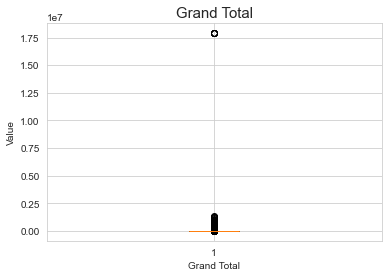

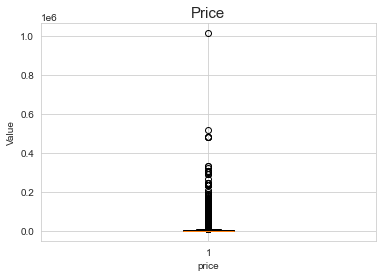

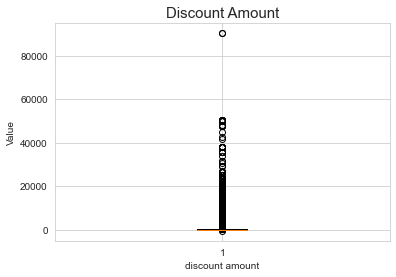

In [70]:

plt.boxplot(df['grand_total']) #creating boxplot using matplotlib
plt.title('Grand Total', size = 15) #title
plt.xlabel('Grand Total') #xlabel
plt.ylabel('Value') #ylabel
plt.show()

plt.boxplot(df['price']) #creating boxplot using matplotlib
plt.title('Price', size = 15) #title
plt.xlabel('price') #xlabel
plt.ylabel('Value') #ylabel
plt.show()

plt.boxplot(df['discount_amount']) #creating boxplot using matplotlib
plt.title('Discount Amount', size = 15) #title
plt.xlabel('discount amount') #xlabel
plt.ylabel('Value') #ylabel
plt.show()

## Duplicate

In [71]:
# memeriksa data duplikat
df.duplicated().sum()

0

Dari hasil pengujian outliers, dapat dilihat bahwa banyak sekali data yang terindikasi outliers. Akan tetapi menghapus outliers akan membuat data menjadi bias sehingga pada tahap ini tidak ada data yang dihilangkan karena outliers.<br>
Dari hasil pengujian data duplikat, tidak ditemukan adanya data duplikat.

In [72]:
# menyimpan data untuk digunakan dalam pengolahan tableu

# df.to_excel("D:\Belajar Data Science\Capstone Project\E-commerce.xlsx")

# df.to_excel("E-commerce.xlsx")


# Data Analysis

Setelah melakukan data understanding dan data cleanning, tahap selanjutnya adalah melakukan data analisis yang bertujuan untuk mengetahui karakteristik data yang kita miliki saat ini.<br>
<br>
Analisis pertama yang dilakukan adalah melihat kategori produk mana yang paling laku dijual di e-commerce selama periode waktu Maret 2016 sampai dengan Agustus 2018.

## Produk kategori yang paling banyak laku dari Maret 2016 - Agustus 2018

In [73]:
df['category_name_1'].value_counts()

Mobiles & Tablets     115709
Men's Fashion         92218 
Women's Fashion       59720 
Appliances            52413 
Superstore            43611 
Beauty & Grooming     41493 
Soghaat               34011 
Others                29372 
Home & Living         26504 
Entertainment         26322 
Health & Sports       17502 
Kids & Baby           16489 
Computing             15933 
\N                    7833  
School & Education    3478  
Books                 1870  
Name: category_name_1, dtype: int64

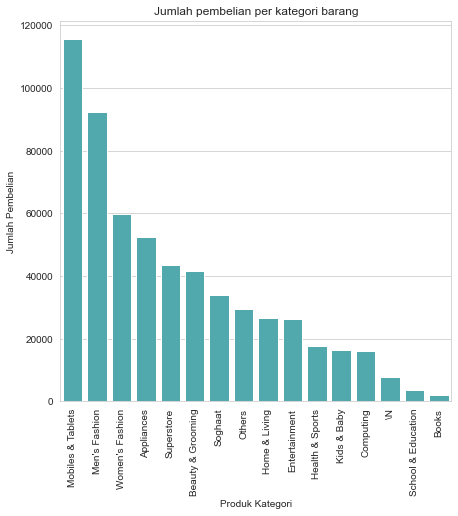

In [74]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, x = 'category_name_1',color='#42b7bd',order = df['category_name_1'].value_counts().index)
plt.title('Jumlah pembelian per kategori barang')
plt.xticks(rotation=90)
plt.xlabel('Produk Kategori')
plt.ylabel('Jumlah Pembelian')
plt.show()

<AxesSubplot:xlabel='category_name_1', ylabel='count'>

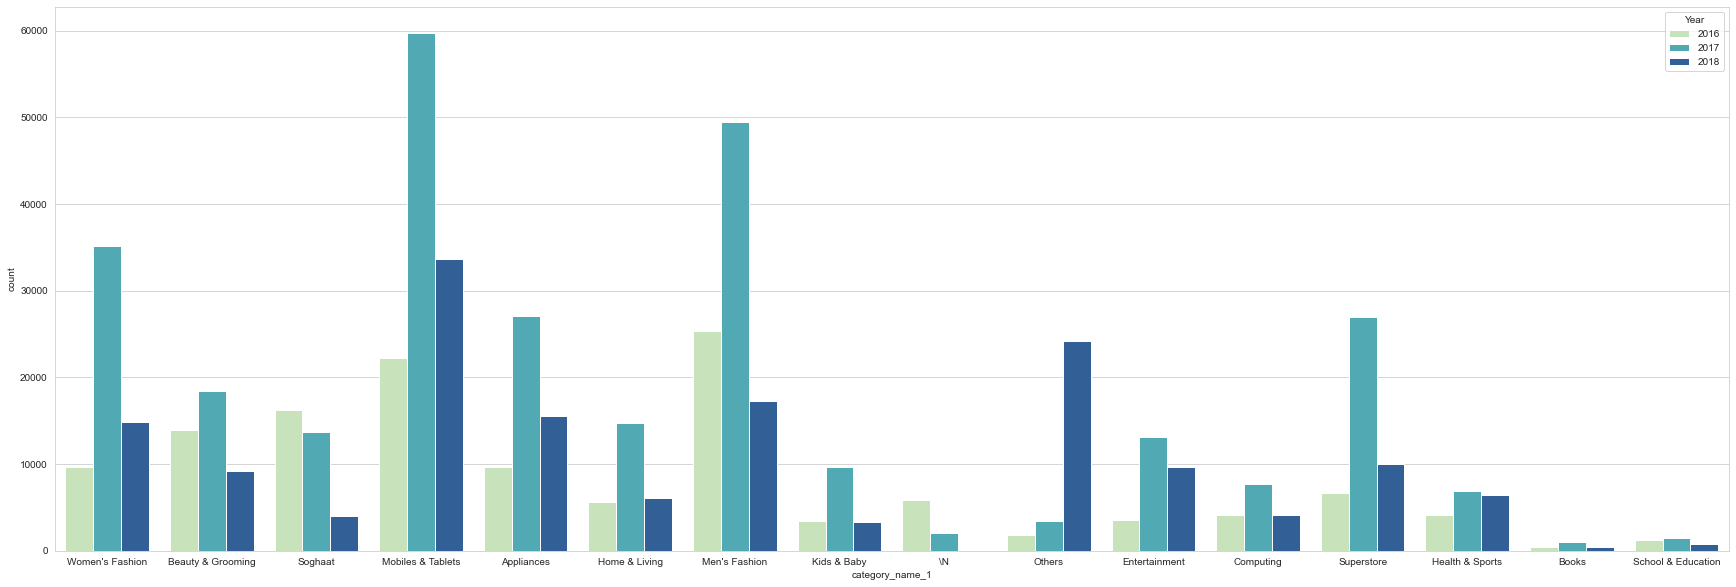

In [75]:
# countplot dari produk kategori yang paling laku dari tahun yang berbeda (2016-2018)

plt.figure(figsize=(30,10))

sns.set_style("whitegrid")
sns.countplot(x='category_name_1', data = df, hue='Year', palette='YlGnBu')


### Analisis

Berdasarkan tabel dan grafik produk kategori yang paling banyak laku dari Maret 2016 sampai dengan Agustus 2018 diketahui bahwa Mobile & Tablet merupakan kategori produk yang paling laku dengan total transaksi sebanyak 115709 diikuti Men's fashion dengan total transaksi sebanyak 92218 dan Women's Fashion dengan total transaksi sebanyak 59720.Sedangkan pada data tahunan, pada tahun 2017 menjadi tahun yang paling banyak laku untuk ketiga kategori produk tersebut, dimana mobile & tablet total penjualannya hampir mencapai 600000 transaksi. Dikutip dari seller.alibaba.com dan hutch.pk menyatakan bahwa mobile & tablet, men's fashion dan women's fashion masuk kedalam 10 kategori produk yang paling banyak dicari oleh masyarakat Pakitas melalui e-commerce.
<br>
<br>
source: https://www.hutch.pk/most-demanding-online-products-in-pakistan/<br>
        https://seller.alibaba.com/businessblogs/px001tae0-10-best-selling-online-products-in-pakistan

### Rekomendasi

Rekomendasi yang dapat diberikan adalah untuk kategori produk mobile & tablet adalah untuk fokus meningkatkan promosi dan marketing dengan program-program yang menarik dan menguntungkan untuk pelanggan pada umur 21 sampai 30 tahun karena 77% pengguna smartphone ada pada rentang umur tersebut. Selain menjual smartphone, e-commerce disaranakan untuk menjual low-cost phone alasannya adalah masih banyak pengguna yang menggunakan low-cost phone sebagai secondary option untuk alasan keamanan dan juga e-commerce bisa menyediakan produk penunjang dari mobile & tablet seperti aksesoris 3rd party ataupun aksesoris official dengan harga lebih murah dibanding harga pembelian secara offline.
<br>
<br>
source: https://pas.org.pk/smart-phone-usage-in-pakistan-infographics/

## Tiga Kategori Produk dengan Pendapatan Terbesar dan Terkecil

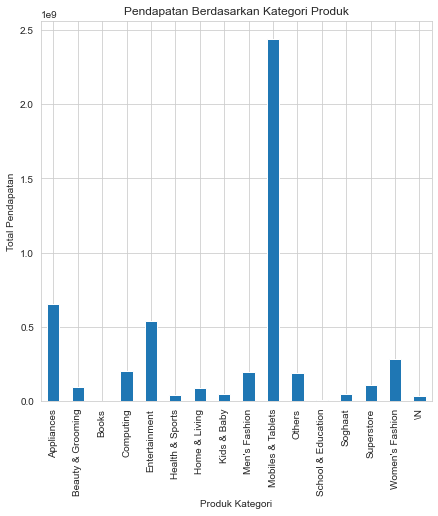

In [76]:
revenue = df.groupby('category_name_1')['grand_total'].sum()
plt.figure(figsize=(7,7))
revenue.plot(x='category_name_1', y = 'grand_total', kind='bar')
plt.title('Pendapatan Berdasarkan Kategori Produk')
plt.xticks(rotation=90)
plt.xlabel('Produk Kategori')
plt.ylabel('Total Pendapatan')
plt.show()

In [77]:
# Tiga kategori produk yang memberikan pendapatan terbesar.
dfincome = df.groupby(['category_name_1']).sum().sort_values('grand_total', ascending=False)[['grand_total']].reset_index()
dfincome.head(3)

,category_name_1,grand_total
0,Mobiles & Tablets,2440776734.022
1,Appliances,656849685.762
2,Entertainment,538991364.033


In [78]:
dfincome.tail(3)

,category_name_1,grand_total
13,\N,35820561.735
14,School & Education,6237084.130
15,Books,2676194.695


### Analisis

Berdasarkan tabel dan grafik kategori produk untuk Mobiles & tablet masih memberikan kontribusi yang besar terhadap pendapatan e-commerce selain jumlah penjualannya yang besar, akan tetapi ada perbedaan untuk peringkat kedua dan ketiga untuk pendapatan e-commerce. Appliance dan Entertainment memberikan pendapatan yang lebih baik dibandingkan men's fashion dan women's fashion. Kemungkinan hal ini terjadi karena harga satuan produk appliances dan entertainment jauh lebih tinggi dibandingkan fashion sehingga walaupun bukan salah satu penjualan terbanyak namun memberikan kontribusi pendapatan yang lebih baik.

### Rekomendasi

Rekomendasi yang dapat diberikan untuk kategori produk Appliances dan Entertainment yaitu memberikan promosi dengan product bundling, karena produk Appliances dan Entertainment tidak murah sehingga memberikan diskon untuk produk kedua, ketiga dan seterusnya akan meningkatkan minat beli konsumen untuk produk-produk berikutnya. Selain itu produk bundling bisa dilakukan dengan aksesoris penunjang dari appliances dan juga entertainment.

## Pendapatan E-commerce setiap Tahun

In [79]:
# Pendapatan E-commerce dari seluruh produk disetiap tahunnya

dfyear = df.groupby(['Year']).sum().sort_values('Year', ascending=True)[['grand_total']].reset_index()
dfyear


,Year,grand_total
0,2016,645585271.300
1,2017,2247206154.783
2,2018,2093380018.484


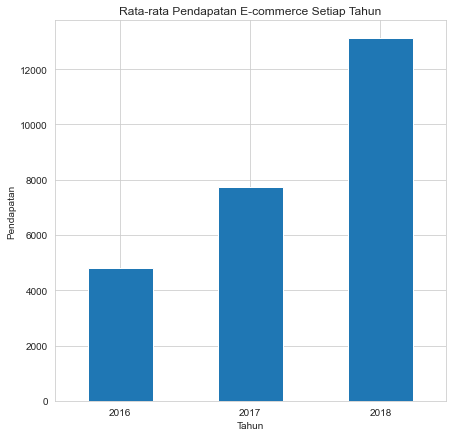

In [80]:
year = df.groupby('Year')['grand_total'].mean()
plt.figure(figsize=(7,7))
year.plot(x='Year', y = 'grand_total', kind='bar')
plt.title('Rata-rata Pendapatan E-commerce Setiap Tahun')
plt.xticks(rotation=0)
plt.xlabel('Tahun')
plt.ylabel('Pendapatan')
plt.show()

## Jumlah Pendapatan setiap bulannya dari Maret 2016 sampai dengan Agustus 2018

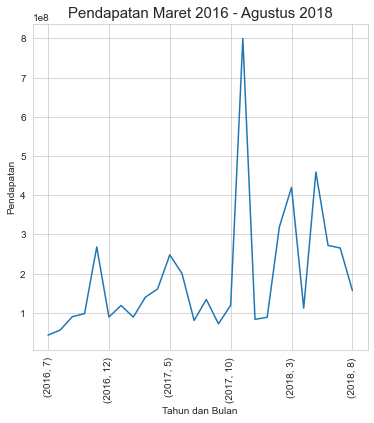

In [93]:
date = df.groupby(['Year','Month'])['grand_total'].sum()
plt.figure(figsize=(6,6))
date.plot(x=['Year','Month'], y = 'grand_total', kind='line')
plt.title('Pendapatan Maret 2016 - Agustus 2018', fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Tahun dan Bulan')
plt.ylabel('Pendapatan')
plt.show()

In [82]:
dfmonth = df.groupby(['M-Y']).sum().sort_values('grand_total', ascending=False)[['grand_total']].reset_index()
dfmonth

,M-Y,grand_total
0,11-2017,799528196.086
1,5-2018,459207446.522
2,3-2018,420077928.367
3,2-2018,319100176.640
4,6-2018,271988703.920
5,11-2016,268304534.740
6,7-2018,265389518.053
7,5-2017,248002927.280
8,6-2017,200561275.147
9,4-2017,160988358.970


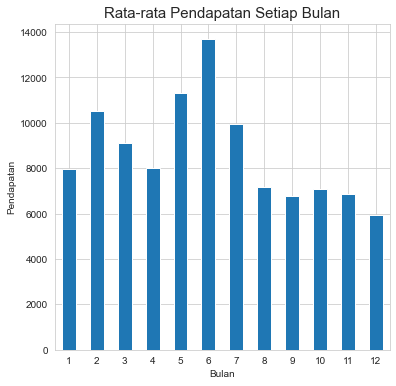

In [83]:
month = df.groupby('Month')['grand_total'].mean()
plt.figure(figsize=(6,6))
month.plot(x='Month', y = 'grand_total', kind='bar')
plt.title('Rata-rata Pendapatan Setiap Bulan', fontsize=15)
plt.xticks(rotation=0)
plt.xlabel('Bulan')
plt.ylabel('Pendapatan')
plt.show()


### Analisis

Berdasarkan hasil grafik dan tabel tahunan dan bulanan, dapat dikatakan secara grafik pendapatan(rata-rata) tahunan selalu meningkat untuk tahun 2016 sampai dengan 2018. Secara grafik pendapatan bulanan(total) selalu fluktuatif dan ada beberapa spike di bulan bulan tertentu seperti pada bulan November 2017, sedangkan untuk rata-rata bulanan bulan Mei, Juni, dan Juli merupakan tiga bulan dengan rata-rata tertinggi. Hal tersebut terjadi karena pada bulan tersebut merupakan bulan Ramadhan, dimana rata-rata penduduk Pakistan beragama Muslim sehingga peningkatan tersebut dianggap wajar.

### Rekomendasi

Rekomendasi yang bisa dilakukan adalah memberikan promosi dan program marketing terkait produk yang berkaitan dengan Ramadhan ataupun produk-produk yang mampu membantu konsumen dalam menjalankan ibadah puasa seperti makanan, pakaian untuk beribadah ataupun untuk hari raya, alat-alat ibadah dll. Selain itu produk bisa dilakukan promosi untuk produk entertainment, karena kebanyakan masyarakat Pakistan akan mengurangi jam kerja dan lebih menghabiskan waktu bersama keluarga ataupun teman sehingga produk entertaiment akan cenderung cepat laku jika diberikan promo yang menarik.

## Jumlah status order dari tahun 2016 sampai 2018

<AxesSubplot:xlabel='status', ylabel='count'>

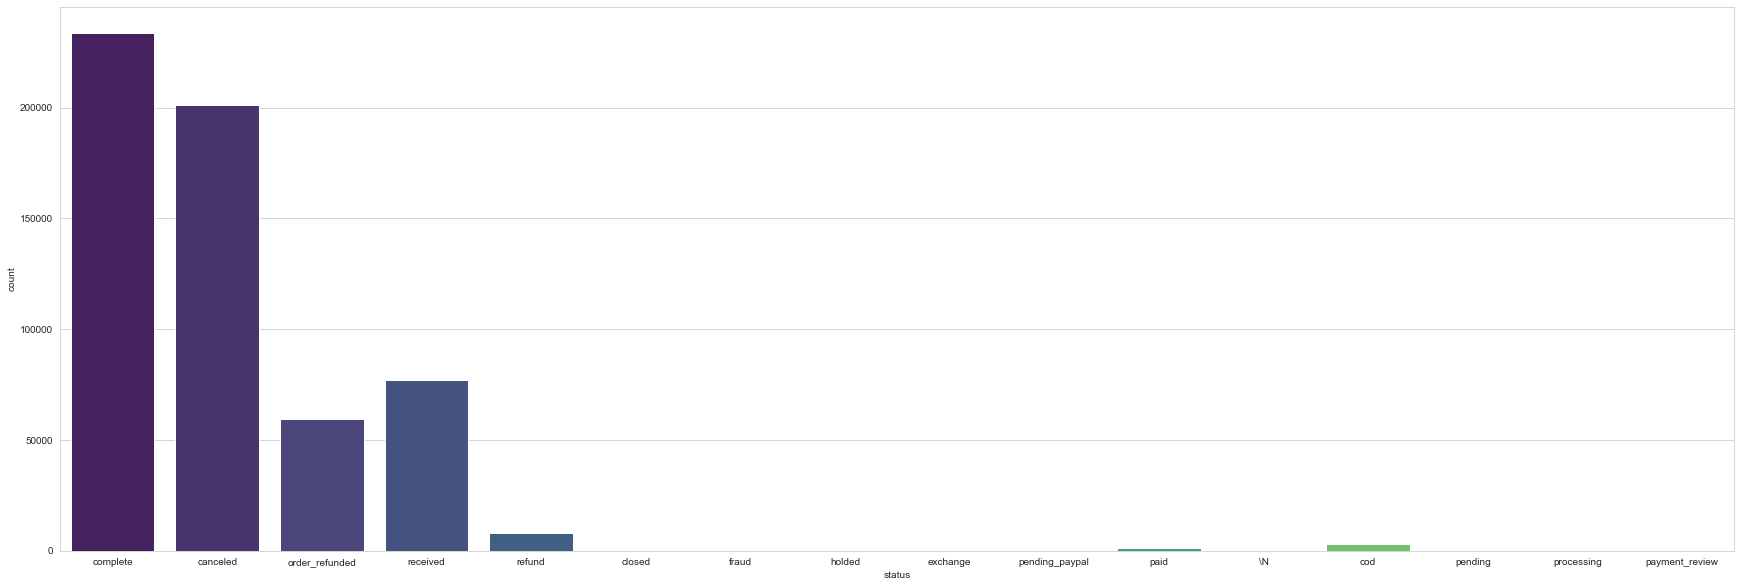

In [84]:
# Jumlah status order dari tahun 2016 sampai 2018
plt.figure(figsize=(30,10))

sns.set_style("whitegrid")
sns.countplot(x='status', data = df, palette='viridis')

In [85]:
cancelcat = df.loc[df['status'] == 'canceled']['category_name_1'].value_counts().to_frame('Total')
cancelcat

,Total
Mobiles & Tablets,53715
Men's Fashion,22024
Appliances,21628
Others,18472
Women's Fashion,15961
Superstore,13926
Entertainment,12578
Beauty & Grooming,9686
Soghaat,7593
Home & Living,7199


In [86]:
cancelPayMet = df.loc[df['status'] == 'canceled']['payment_method'].value_counts().to_frame('Total')
cancelPayMet

,Total
Payaxis,61267
Easypay,52036
cod,21744
jazzwallet,16933
bankalfalah,16184
easypay_voucher,12189
Easypay_MA,9209
jazzvoucher,8472
apg,1361
ublcreditcard,660


### Analisis

Berdasarkan grafik dan tabel diperingkat pertama untuk status order adalah complete atau selesai, akan tetapi pada peringkat kedua dengan jumlah yang tidak jauh berbeda yaitu canceled atau membatalkan. Dari peringkat kedua ini dapat dikatakan kemungkinan ada sesuatu yang tidak baik dari produk yang dijual oleh e-commerce ataupun perilaku belanja online orang Pakistan. Menurut artikel yang ditulis oleh Dawn.com ada beberapa alasan mengapa orang Pakistan tidak membeli secara online yaitu daftar produk yang tidak akurat, tidak cukup detail menyampaikan informasi terkait produk, stock manajemen buruk yang mengakibatkan delay ataupun mengirimkan produk yang salah, produk rusak atau replika, overprice, fake review, after sales service yang buruk. Beberapa alasan itulah yang membuat konsumen di Pakistan membatalkan ordernya. Selain itu jika dilihat dari metode pembayaran Payaxis dan Easypay berkontribusi terhadap 113303 status canceled, hal ini harus teliti lebih jauh apakah ada indikasi metode pembayaran ini digunakan untuk melakuan penipuan.<br>
<br>
source: https://www.dawn.com/news/1455041

### Rekomendasi

Rekomendasi yang dapat dilakukan adalah e-commerce bisa memperbaiki sistem listing barang untuk para Seller yang ingin menjual produknya. Seller wajib memberikan informasi selengkap-lengkapnya untuk produk yang mereka jual. Jika Seller tidak mengisi informasi dengan lengkap maka sistem akan menolak produk yang akan dilistin kedalam e-commerce. E-commerce juga harus bisa menghapus Seller yang berniat melakukan scam dengan memberikan tanda warning pada produk yang terlalu murah ataupun terlalu mahal sehingga timbul rasa percaya konsumen terhadap e-commerce yang digunakan. 

## Penggunaan Sales Commision Code oleh Pelanggan

In [87]:
# df["gender"] = np.where(df["gender"] == "female", 0, 1)
df['Use_Code'] = np.where(df['sales_commission_code'] == '\\N', 'No','Yes')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584478 entries, 0 to 584523
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584478 non-null  int32  
 1   status                 584478 non-null  object 
 2   created_at             584478 non-null  object 
 3   sku                    584478 non-null  object 
 4   price                  584478 non-null  float64
 5   qty_ordered            584478 non-null  int32  
 6   grand_total            584478 non-null  float64
 7   increment_id           584478 non-null  object 
 8   category_name_1        584478 non-null  object 
 9   sales_commission_code  584478 non-null  object 
 10  discount_amount        584478 non-null  float64
 11  payment_method         584478 non-null  object 
 12  Year                   584478 non-null  int32  
 13  Month                  584478 non-null  int32  
 14  M-Y                    584478 non-nu

In [89]:
df['Use_Code'].value_counts()

No     476132
Yes    108346
Name: Use_Code, dtype: int64

<AxesSubplot:xlabel='category_name_1', ylabel='count'>

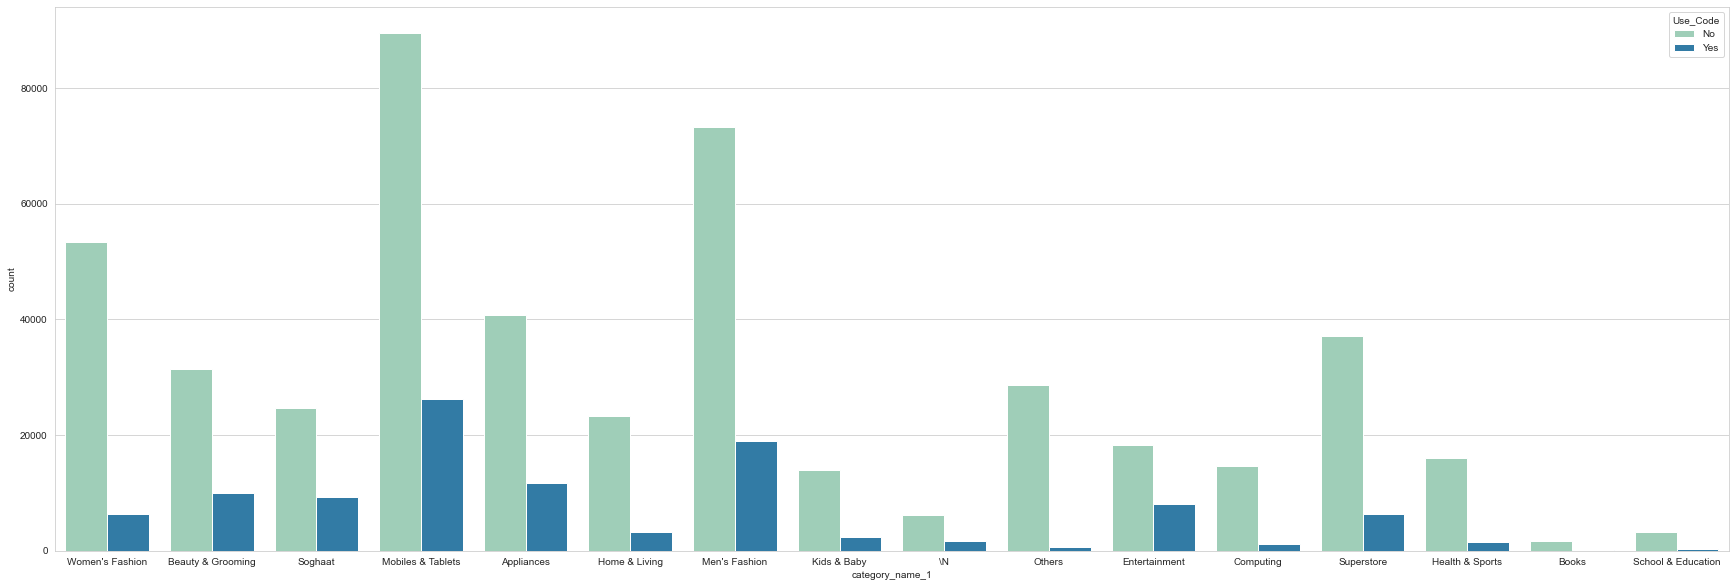

In [90]:
plt.figure(figsize=(30,10))

sns.set_style('whitegrid')
sns.countplot(x='category_name_1', data = df, hue='Use_Code', palette='YlGnBu')

### Analisis

Pada analisis ini dilakukan perubahan data untuk memudahkan analisis antara konsumen yang menggunakan commission code dan tidak, dimana sebelumnya data sales_commision_code memiliki unique code yang banyak sekarang dibuatkan kolom baru (use_code) yang memiliki data categori Yes atau No. Dari hasil analisis ditemukan bahwa 476132 tidak menggunakan commission code dan 108346 menggunakan commission code. kategori produk tertinggi yang menggunakan comission code adalah mobiles & tablets lalu diikuti oleh men's fashion.

### Rekomendasi

Rekomendasi yang dapat diberikan adalah e-commerce harus bisa mencari influencer yang mampu menjadi affiliate marketing dari e-commerce. Influencer dapat melakukan review produk dan mengarahkan link pembelian yang telah terafiliasi dengan commision code mereka. Affiliate marketing merupakan channel marketing yang cukup efektif saat ini karena banyaknya pengguna media sosial di Pakistan yang telah mencapai 46 juta jiwa di tahun 2021. Hal yang diperlukan oleh e-commerce terhadap para affiliate-nya adalah tetap memberikan informasi yang jujur dan original terkait produk yang mereka review. Menurut influencermarketinghub.com affiliate marketing menyumbang 16% dari total penjualan e-commerce. Selain menjadi penjualan affiliate marketing juga meningkatkan keterikatan brand product terhadap konsumen.<br>
<br>
source: https://influencermarketinghub.com/affiliate-marketing-strategies/<br>
https://datareportal.com/reports/digital-2021-pakistan#:~:text=Social%20media%20statistics%20for%20Pakistan,total%20population%20in%20January%202021.

# Statistic

In [91]:
# cek distribusi kolom data grand_total

from scipy.stats import normaltest

norm, pval = normaltest(df["grand_total"])

if pval < 0.05 :
    print (f'Tolak H0 karena ({pval} < 5%)')
    print ('Data Tidak Berdistribusi Normal')
else :
    print (f'Gagal untuk menolak H0 ({pval} > 5%)')
    print ('Data Berdistribusi Normal')

Tolak H0 karena (0.0 < 5%)
Data Tidak Berdistribusi Normal


In [92]:
# Tes Perbandingan untuk grand total untuk setiap category product menggunakan kruskal-wallis method (lebih dari 2 variable independen non parametrik)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    df[df['category_name_1'] == 'Mobiles & Tablets']['grand_total'],
    df[df['category_name_1'] == "Men's Fashion"]['grand_total'],
    df[df['category_name_1'] == 'Appliances']['grand_total'],
    df[df['category_name_1'] == 'Others']['grand_total'],
    df[df['category_name_1'] == "Women's Fashion"]['grand_total'],
    df[df['category_name_1'] == 'Superstore']['grand_total'],
    df[df['category_name_1'] == 'Entertainment']['grand_total'],
    df[df['category_name_1'] == 'Beauty & Grooming']['grand_total'],
    df[df['category_name_1'] == 'Soghaat']['grand_total'],
    df[df['category_name_1'] == 'Home & Living']['grand_total'],
    df[df['category_name_1'] == 'Computing']['grand_total'],
    df[df['category_name_1'] == 'Kids & Baby']['grand_total'],
    df[df['category_name_1'] == 'Health & Sports']['grand_total'],
    df[df['category_name_1'] == '\\N']['grand_total'],
    df[df['category_name_1'] == 'School & Education']['grand_total'],
    df[df['category_name_1'] == 'Books']['grand_total']
)

if pvalkrus < 0.05 :
    print (f'Tolak H0 karena P-value ({pval} < 5%)')
    print ('Ditemukan perbedaan dalam nilai median untuk grand total untuk masing-masing kategori produk')
else :
    print (f'Gagal menolak H0 karena P-value ({pval} > 5%)')
    print ('Tidak ditemukan perbedaan dalam nilai median untuk grand total untuk masing-masing kategori produk')

Tolak H0 karena P-value (0.0 < 5%)
Ditemukan perbedaan dalam nilai median untuk grand total untuk masing-masing kategori produk
